![example](images/director_shot.jpeg)

# MOVIE DATA DIVE

**Authors:** Margaret Nduta Njenga
***

## Overview

This project presents an analysis of movie data, aiming to offer insights to Microsoft for their potential venture into launching a new movie studio.

In this movie data analysis project, I tackled the pressing business challenge of optimizing film selection for a budding streaming service. Leveraging a diverse dataset encompassing genres, release dates, ratings, and box office performance, I employed exploratory data analysis and data visualizations to unearth valuable trends and patterns. My findings revealed key insights into audience preferences and genre popularity dynamics. These insights pave the way for strategic decision-making, empowering Microsoft to curate a compelling film catalog tailored to audience tastes and maximize the success of their cinematic endeavors.


## Business Problem


The business problem I am addressing revolves around the need for Microsoft to strategically navigate the highly competitive entertainment landscape, particularly in the realm of film production and distribution. As the company considers venturing into establishing a new movie studio, the challenge lies in identifying the most promising genres, optimal release timings, and audience preferences to curate a compelling and commercially successful film catalog. With countless options available and ever-evolving audience tastes, the task at hand is to leverage data-driven insights to minimize risks and maximize the likelihood of achieving blockbuster success in this dynamic industry.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

The data being used in this analysis comprises a rich and diverse set of information pertaining to the film industry. It encompasses a wide array of variables such as genre classifications, release dates, box office performance metrics, audience ratings, critical reviews, production budgets, and demographic indicators. Additionally, the dataset incorporates historical trends spanning multiple years and includes a comprehensive range of movies across various genres and production scales. This robust dataset provides a nuanced understanding of the film landscape, enabling me to extract actionable insights to guide Microsoft's strategic decision-making in establishing its movie studio venture.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import sqlite3
import zipfile
import os

%matplotlib inline

In [2]:
#open the first file and read it then store in a DataFrame called bom_df
with gzip.open('zippedData/bom.movie_gross.csv.gz','rb') as f:
    bom_df= pd.read_csv(f)
bom_df    
    

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#check the information of the bom_df DataFrame to understand it more
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#check the number of rows and columns of bom_df
bom_df.shape

(3387, 5)

In [5]:
#unzipped the folder that contained the sqlite3 data 
#in order to access the data
#which will be used as the second DataFrame
def unzip_file(zip_file, extract_to):
    with zipfile.ZipFile(zip_file,'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file = 'zippedData/im.db.zip'
extract_to = 'zippedData/im.db'

if not os.path.exists(extract_to):
    os.makedirs(extract_to)

unzip_file(zip_file,extract_to)


In [6]:
#connect to the database
def query_sqlite_database(db_file, query):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
   
    # Execute the query
    df = pd.read_sql_query(query,conn)

    conn.close()
   
    return df


db_file = 'zippedData/im.db/im.db'
query = """ SELECT * FROM movie_basics 
            LEFT JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
            """

# Query the Lite database
df = query_sqlite_database(db_file, query)
df
# mdf = query_sqlite_database(db_file, query)
# mdf.loc[mdf['runtime_minutes']>1000]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN


## Data Preparation

The data being utilized for this analysis comprises a comprehensive dataset sourced primarily from IMDb (Internet Movie Database). The dataset is structured and cleaned to ensure accuracy and consistency, allowing for robust analysis and insights generation. With this rich and diverse dataset, I am well-equipped to delve deep into the dynamics of the movie landscape and derive actionable insights to inform Microsoft's strategic decision-making for its new movie studio venture.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [7]:
# rename columns to be able to merge
df.rename(columns={'primary_title':'title'},inplace=True)

#Merge bom_df data to df data using inner join
gross_df = pd.merge(bom_df,df, on='title', how='inner')

#Create a new column named "total_gross" which sums domestic and foreign gross
gross_df['total_gross']  = gross_df[['domestic_gross','foreign_gross']].sum(axis=1)

#Create a new column named "genre" which slits each genre to a single index
gross_df['genre'] = gross_df['genres'].apply(lambda x: x.split(',') if isinstance(x,str) else [])

In [8]:
#apply explode and check the new DataFrame
gross_df = gross_df.apply(pd.Series.explode)
gross_df

,title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,total_gross,genre
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Adventure
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Animation
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,292600000.0,Action
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,292600000.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",tt6776572,7.0,1016.0,8900.0,Thriller
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Action
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Drama
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Thriller


In [9]:
#check for the total missing values
gross_df.isna().sum()

title                 0
studio                6
domestic_gross       52
foreign_gross      2742
year                  0
movie_id              0
original_title        0
start_year            0
runtime_minutes     209
genres               40
movie_id            486
averagerating       486
numvotes            486
total_gross           0
genre                40
dtype: int64

In [10]:
#drop missing values for the "genre" and "runtime_minutes" columns
gross_df.dropna(subset=['genre','runtime_minutes'], inplace=True)
gross_df

,title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,total_gross,genre
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Adventure
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Animation
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,292600000.0,Action
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,292600000.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",tt6776572,7.0,1016.0,8900.0,Thriller
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Action
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Drama
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Thriller


In [11]:
# def calculate_weighted_average(row):
#     return (row['averagerating'] * row['numvotes']) /numvotes

# numvotes = df['numvotes'].sum()
# df["Weighted_Rating"] = df.apply(calculate_weighted_average,axis=1)
#drop all missing values for all columns
df.isna().sum()

df.dropna(subset=['averagerating','numvotes','genres','runtime_minutes'],inplace=True)
df.isna().sum()

movie_id           0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

In [12]:
#check the new DataFrame
df

,movie_id,title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263.0
...,...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4,365.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136.0


## Data Modeling
To model the data being used for this analysis, I employed various statistical and data visualization techniques to uncover patterns, trends, and relationships within the dataset

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [13]:
#extract the relevant data by using groupby and sort the values
aggregate_genre = gross_df.groupby('genre')['total_gross'].mean().sort_values(ascending = False)
aggregate_genre

genre
Sci-Fi         1.091788e+08
Adventure      9.419664e+07
Animation      8.678055e+07
Action         5.869206e+07
Fantasy        5.309337e+07
Family         4.475765e+07
Sport          3.790316e+07
Comedy         3.400941e+07
Thriller       2.900825e+07
Horror         2.725720e+07
Musical        2.485796e+07
Western        2.470399e+07
Crime          2.387058e+07
Mystery        2.256173e+07
Biography      2.098164e+07
History        1.975284e+07
Music          1.731819e+07
Documentary    1.641446e+07
Drama          1.626990e+07
Romance        1.532489e+07
War            5.109455e+06
News           3.640900e+06
Name: total_gross, dtype: float64

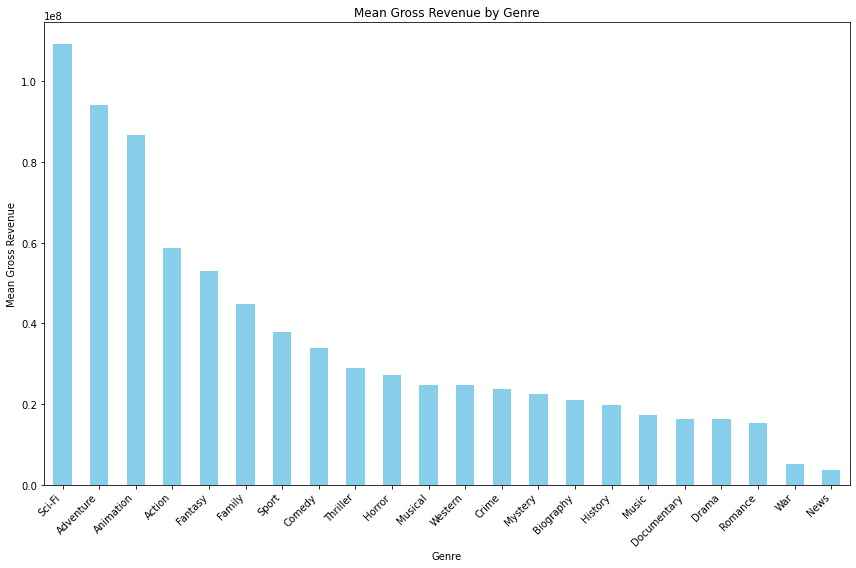

In [14]:
# Plotting mean gross revenue by genre
plt.figure(figsize=(12, 8))
aggregate_genre.plot(kind='bar', color='skyblue')
plt.title('Mean Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();


In [15]:
#add a column in the df DataFrame that includes the genres split into an individual index
df['genre'] = df['genres'].apply(lambda x: x.split(',') if isinstance(x,str) else [])
df = df.apply(pd.Series.explode)
df

,movie_id,title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,Drama
...,...,...,...,...,...,...,...,...,...,...
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5.0,Documentary
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6.0,Documentary
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136.0,Drama
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136.0,Family


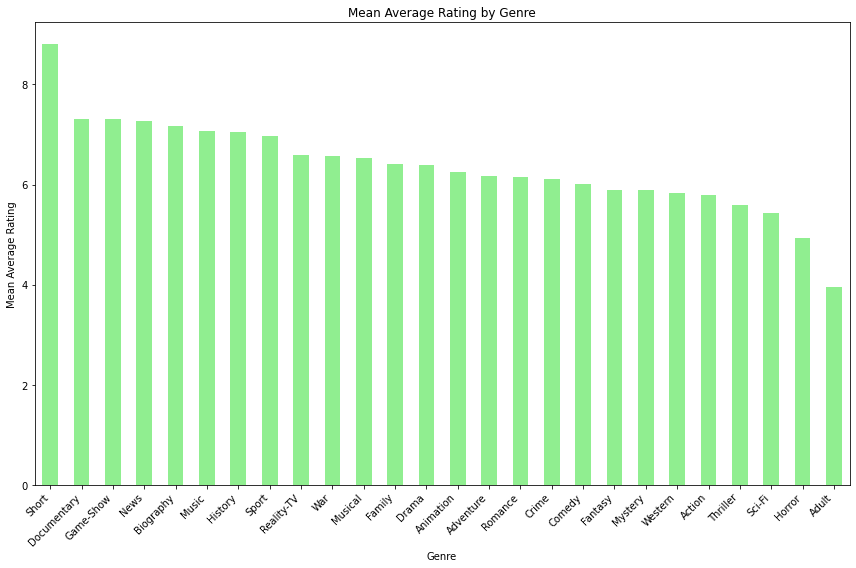

In [16]:
# Group by genre to calculate the mean average rating for each genre
genre_mean_rating = df.groupby('genre')['averagerating'].mean().sort_values(ascending=False)

# Plotting mean average rating by genre
plt.figure(figsize=(12, 8))
genre_mean_rating.plot(kind='bar', color='lightgreen')
plt.title('Mean Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

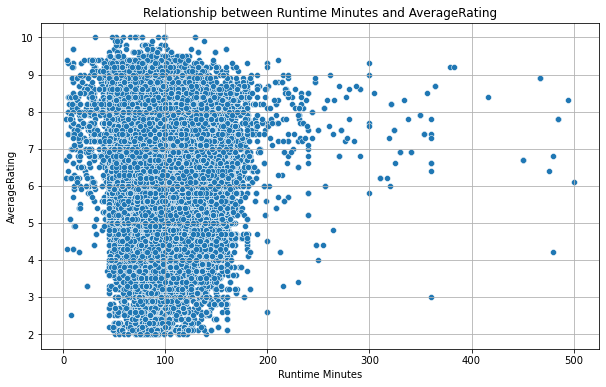

In [17]:
# Define a function to identify and remove outliers using z-score
def remove_outliers(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df_filtered = df[(z_scores < 3) & (z_scores > -3)]
    return df_filtered

# Remove outliers from 'runtime_minutes' and 'rating'
df_filtered = remove_outliers(df, 'runtime_minutes')
df_filtered = remove_outliers(df_filtered, 'averagerating')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=df_filtered)
plt.title('Relationship between Runtime Minutes and AverageRating')
plt.xlabel('Runtime Minutes')
plt.ylabel('AverageRating')
plt.grid(True)


In [18]:
df

,movie_id,title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,Drama
...,...,...,...,...,...,...,...,...,...,...
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5.0,Documentary
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6.0,Documentary
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136.0,Drama
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136.0,Family


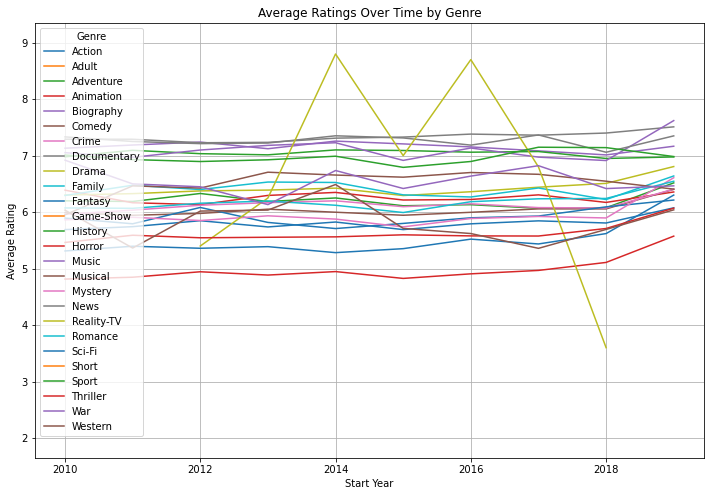

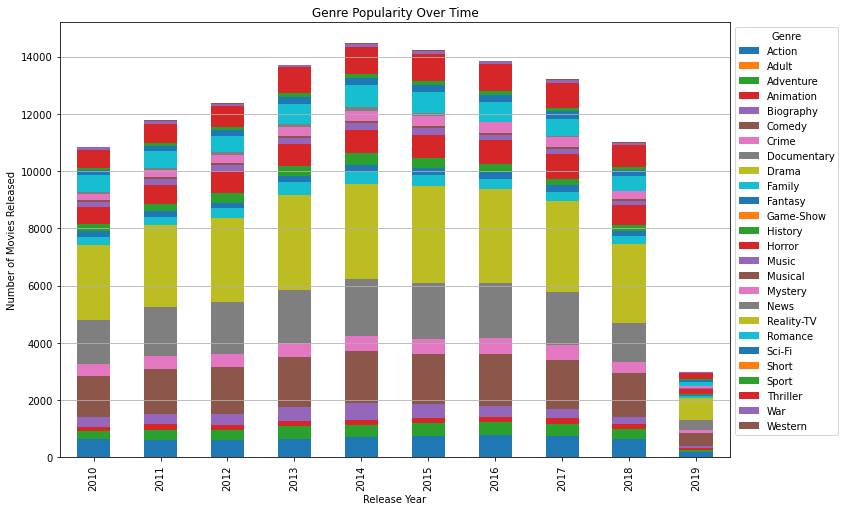

In [19]:
# Group by release year and genre to calculate average ratings
avg_ratings = df.groupby(['start_year', 'genre'])['averagerating'].mean().unstack()

# Calculate genre popularity by counting the number of movies released per genre each year
genre_popularity = df.groupby(['start_year', 'genre']).size().unstack()

# Plotting average ratings over time for each genre
avg_ratings.plot(kind='line', figsize=(12, 8))
plt.title('Average Ratings Over Time by Genre')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

# Plotting genre popularity over time
genre_popularity.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [20]:
gross_df

,title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,total_gross,genre
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Adventure
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Animation
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218.0,415000000.0,Comedy
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,292600000.0,Action
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066.0,292600000.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",tt6776572,7.0,1016.0,8900.0,Thriller
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Action
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Drama
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",tt6523720,6.2,5270.0,6200.0,Thriller


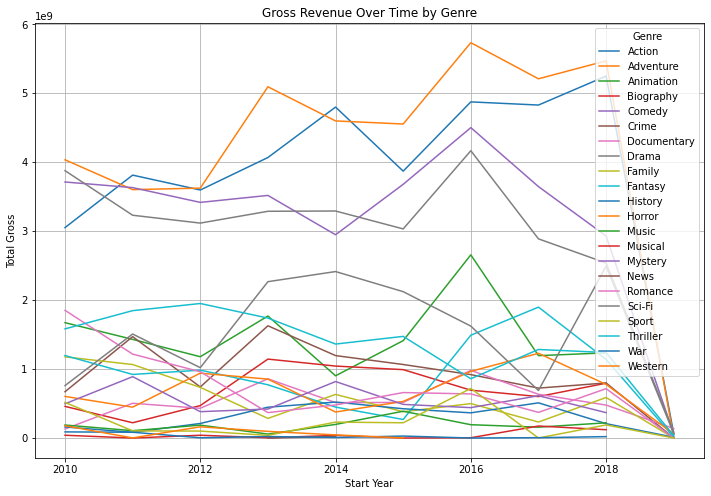

In [21]:
# Group by release year and genre to calculate total gross revenue
genre_gross = gross_df.groupby(['start_year', 'genre'])['total_gross'].sum().unstack()

# Plotting gross revenue over time for each genre
genre_gross.plot(kind='line', figsize=(12, 8))
plt.title('Gross Revenue Over Time by Genre')
plt.xlabel('Start Year')
plt.ylabel('Total Gross')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

## Evaluation
Sci-Fi, Adventure, and Animation films emerge as the primary revenue drivers, whereas Romance, War, and News genres exhibit a relatively smaller market share. The elevated revenue associated with certain genres likely signifies heightened audience demand and widespread popularity, while genres with lower revenue might cater to more niche or specialized audiences.

Short, Documentary, and Game Show films demonstrate a higher mean average rating, contrasting with Sci-Fi, Horror, and Adult genres, which register lower ratings on average. Elevated mean average ratings within specific genres likely reflect stronger audience preferences.

Over the period from 2010 to 2019, most movie genres maintain a relatively consistent average rating, with the exception of Drama/Reality-TV, which displays fluctuating ratings over the years.

Movies with runtimes under 180 minutes emerge as the most preferred choice among audiences.

Throughout the years spanning from 2010 to 2019, Action, Adventure, Comedy, and Sci-Fi genres consistently rank among the top four revenue-generating genres. 

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline modelwhile ?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Given the revenue dominance of Sci-Fi, Adventure and Animation, Microsoft could prioritize these genres when selecting films for its movie studio. Allocating resources and investments toward these genres may yield higher returns.

Genres like Action, Adventure, Comedy, and Sci-Fi consistently generate substantial revenue over the years. Microsoft should consider maintaining a diverse portfolio of films across these genres to ensure consistent revenue streams and mitigate financial risks.

Incorporating genres like Short, Documentary, and Game Show, which boast higher mean average ratings, alongside the top revenue-generating genres can allow Microsoft to align with audience preferences and potentially elevate viewer satisfaction.

The preference for movies with runtimes under 180 minutes suggests a preference for shorter films among audiences. Microsoft could focus on producing films with optimized runtimes to align with audience preferences and maximize engagement.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***